In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
df_inc=pd.read_csv('../DATASETS/AHOGADOS/CSV/historico_inc_est_meteo_codigos_test.csv',sep='|',error_bad_lines=False)

In [38]:
df_inc_clust=df_inc[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Dir. vi.', 'V_Viento', 'Distancia', 
                     'IdActividad', 'IdCausa', 'IdDeteccion', 'IdFactor', 'IdInterv', 'IdOrigen', 
                     'IdPronostico', 'Mortal', 'IdReanima', 'IdRiesgo', 'IdTipo', 'IdVigilancia', 'IdCCAA', 'Poblacion', 
                     'IdProv', 'PobProv', 'Costa', 'IdLocal']]

In [39]:
column_means = df_inc_clust.drop(['IdPronostico'],1).mean()
df_inc_clust = df_inc_clust.fillna(column_means)

In [40]:
df_inc_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 27 columns):
Mes                5468 non-null float64
Edad               5468 non-null float64
T_med              5468 non-null float64
T_max              5468 non-null float64
T_min              5468 non-null float64
Precipitaciones    5468 non-null float64
Dir. vi.           5468 non-null float64
V_Viento           5468 non-null int64
Distancia          5468 non-null float64
IdActividad        5468 non-null int64
IdCausa            5468 non-null int64
IdDeteccion        5468 non-null int64
IdFactor           5468 non-null int64
IdInterv           5468 non-null int64
IdOrigen           5468 non-null int64
IdPronostico       5468 non-null int64
Mortal             5468 non-null int64
IdReanima          5468 non-null int64
IdRiesgo           5468 non-null int64
IdTipo             5468 non-null int64
IdVigilancia       5468 non-null int64
IdCCAA             5468 non-null int64
Poblacion          

In [41]:
#normalizamos los datos
scaler=StandardScaler()
df = df_inc_clust.drop(['IdPronostico'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo

In [42]:
X_scaled.shape

(5468, 26)

In [51]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=25) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [52]:
# Plot the explained variances
features = range(pca.n_components_)

([<matplotlib.axis.XTick at 0x59f3108>,
 <a list of 25 Text xticklabel objects>)

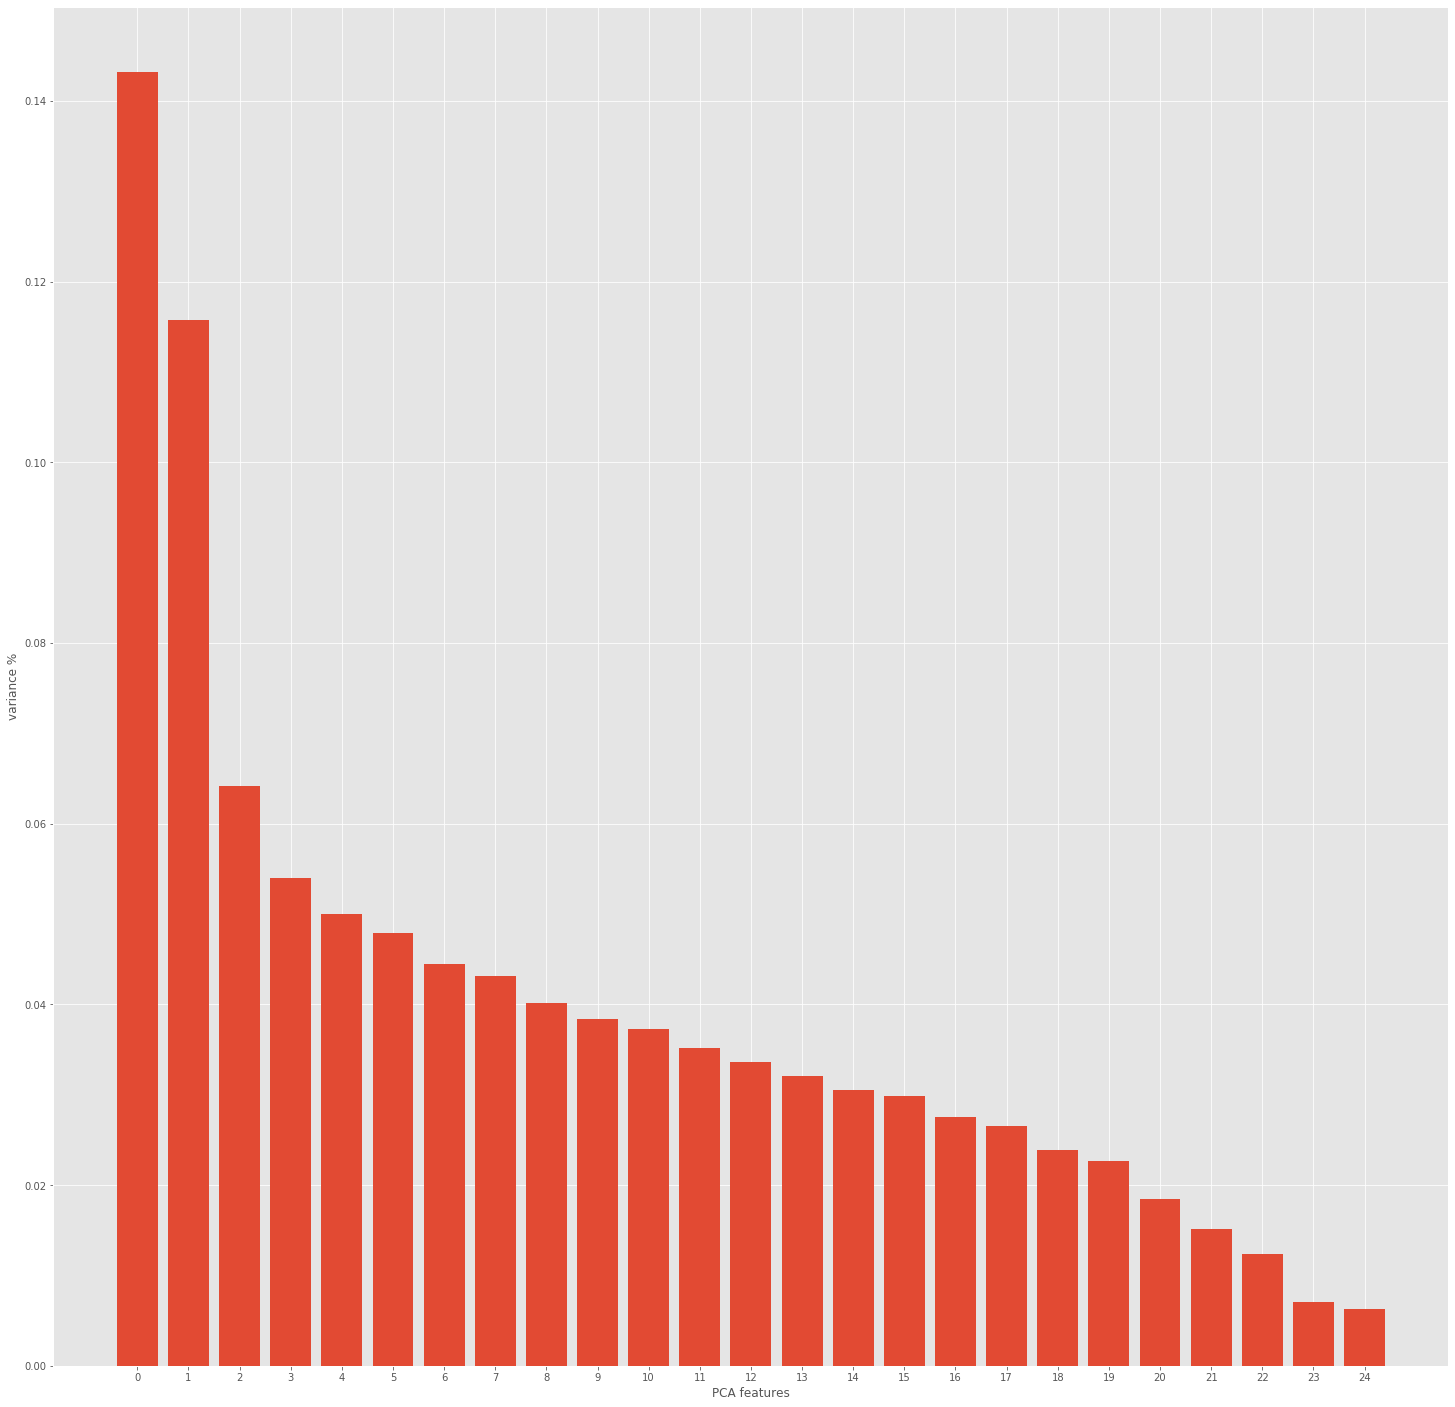

In [53]:
plt.figure(figsize=(25,25)) 
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [58]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:17]))
#Vemos que con 17 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (5468, 25)
[0.14326273 0.11573982 0.06419578 0.05400805 0.04995978 0.04794584
 0.04449397 0.04316106 0.04014312 0.03842595 0.03723392 0.03514517
 0.03364198 0.03211448 0.03053819 0.02989318 0.02759391 0.02656429
 0.02390792 0.02268987 0.01845589 0.01511605 0.01237888 0.00705729
 0.00633214]
suma: 0.8674969134312296


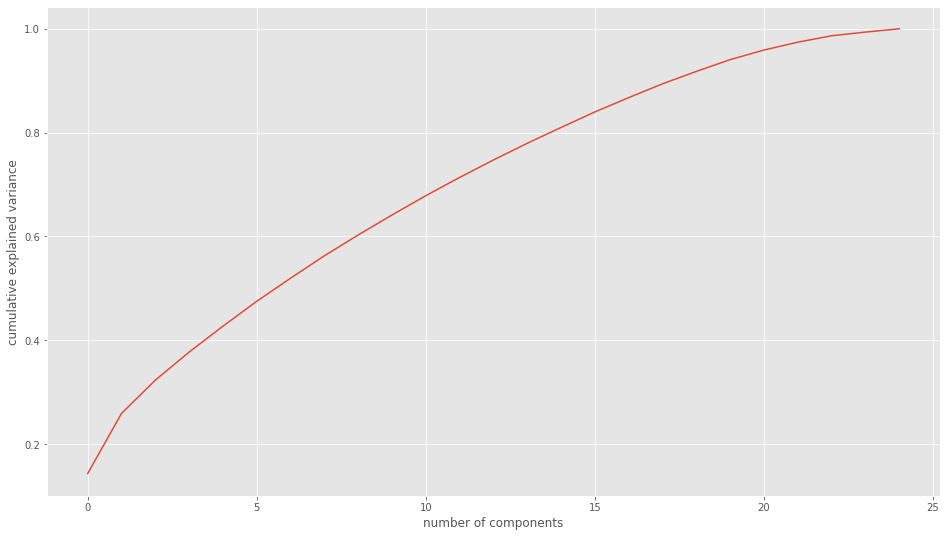

In [59]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

KeyError: 2

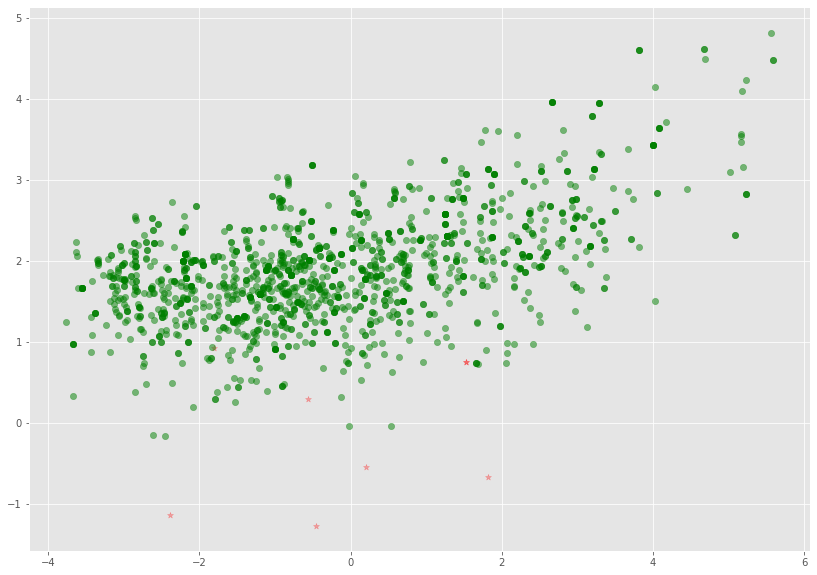

In [60]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=df_inc['IdPronostico'].values
cdict={0:'red',1:'green'}
labl={0:'Sin datos', 1:'Rescate sin consecuencias'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(14,10))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()